In [2]:
import sys

sys.executable


'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\python.exe'

In [3]:
sys.path

['C:\\Users\\noahc',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\python38.zip',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\DLLs',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv',
 '',
 'C:\\Users\\noahc\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\Pythonwin']

In [4]:
%cd C:\Users\noahc\Jupyter\FirstSteps


C:\Users\noahc\Jupyter\FirstSteps


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score


In [6]:
#Import data, perform visual check
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head(40)




,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [7]:
#Assign input and target variables
inputs = df.drop('Y', axis='columns')
target = df['Y']
#drop undesired features


In [126]:
#Split the original data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.30, random_state=0)

**Try Selecting fewer features**

In [127]:
#split the data with selected features
X_selected_train=X_train.drop(columns=['X3','X6'])
X_selected_test=X_test.drop(columns=['X3','X6'])

In [128]:
#Scale all the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [129]:
#Scale all the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train2 = sc.fit_transform(X_selected_train)
X1_test2 = sc.transform(X_selected_test)

**Linear Discriminant Analysis**

In [130]:
#try LDA in 3rd target.
lda = LinearDiscriminantAnalysis(n_components=1)
X_train3 = lda.fit_transform(X_train2, y_train)
X_test3 = lda.transform(X_test2)

**Decision Tree**

In [131]:
from sklearn import tree

In [132]:
model1 = tree.DecisionTreeClassifier(criterion='entropy')

In [133]:
model1.fit(X1_train2, y_train)

DecisionTreeClassifier(criterion='entropy')

In [134]:
model1.score(X1_test2, y_test)

0.5

In [135]:
model1.score(X1_train2, y_train)

0.875

In [136]:
model1.predict([[5,0,0,0]])

array([1], dtype=int64)

**Decision tree with fewer features**

In [137]:
model1.fit(X1_train2, y_train)

DecisionTreeClassifier(criterion='entropy')

In [138]:
model1.score(X1_test2, y_test)

0.5

In [139]:
model1.score(X1_train2, y_train)

0.875

**Random Forest**

In [140]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
model2.fit(X_train2,y_train)

RandomForestClassifier(criterion='entropy')

In [141]:
model2.score(X_test2,y_test)

0.5263157894736842

In [142]:
model2.score(X_train2,y_train)

0.9545454545454546

**Try with selected features**

In [143]:
model2.fit(X1_train2, y_train)

RandomForestClassifier(criterion='entropy')

In [144]:
model2.score(X1_test2, y_test)

0.5263157894736842

In [145]:
model2.score(X1_train2, y_train)

0.875

**Logistic Regression**

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
model3 = LogisticRegression( solver='liblinear',C=0.1)

In [148]:
model3.fit(X_train2, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [149]:
model3.score(X_test2, y_test)

0.47368421052631576

In [150]:
model3.score(X_train2, y_train)

0.5795454545454546

In [151]:
model3.predict_proba(inputs)[:,1]

array([0.87820936, 0.89266694, 0.94020414, 0.93977691, 0.93977691,
       0.94751032, 0.85007228, 0.95189465, 0.93373692, 0.93726295,
       0.87708043, 0.9214324 , 0.95592611, 0.93255783, 0.92176728,
       0.90780253, 0.95239376, 0.95277263, 0.93619801, 0.93326676,
       0.92228012, 0.94623602, 0.94623602, 0.92609982, 0.91628734,
       0.87543799, 0.90144119, 0.84860298, 0.84860298, 0.94645471,
       0.94645471, 0.92409966, 0.90930523, 0.90930523, 0.90507057,
       0.92228012, 0.95208634, 0.95208634, 0.93640482, 0.91015438,
       0.93896441, 0.92330757, 0.94458832, 0.9107718 , 0.87189185,
       0.95224028, 0.94436839, 0.71040612, 0.96114427, 0.94421378,
       0.94421378, 0.94421378, 0.95243066, 0.95243066, 0.90338803,
       0.90338803, 0.92095021, 0.9275477 , 0.95917915, 0.94439615,
       0.91740855, 0.95578349, 0.95578349, 0.96101532, 0.92306166,
       0.92306166, 0.89193911, 0.89655984, 0.9625023 , 0.96167357,
       0.91654623, 0.92724607, 0.9107718 , 0.93640482, 0.96222

In [152]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5
)

In [153]:
xg.fit(X_train2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.800000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, ...)

In [154]:
xg.predict_proba(inputs)[:,1]

array([0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633, 0.7118633,
       0.7118633, 0.7118633, 0.7118633, 0.7118633, 

In [155]:
xg.score(X_test2, y_test)

0.5526315789473685

In [156]:
parameters = [{'solver': ['lbfgs', 'liblinear']},
              {'penalty':['none', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, .155, 1, 10, 100]}]



log_grid = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1000)


log_grid.fit(X1_train2, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START solver=lbfgs...............................................
[CV 1/5; 1/12] END ................solver=lbfgs;, score=0.667 total time=   0.0s
[CV 2/5; 1/12] START solver=lbfgs...............................................
[CV 2/5; 1/12] END ................solver=lbfgs;, score=0.611 total time=   0.0s
[CV 3/5; 1/12] START solver=lbfgs...............................................
[CV 3/5; 1/12] END ................solver=lbfgs;, score=0.556 total time=   0.0s
[CV 4/5; 1/12] START solver=lbfgs...............................................
[CV 4/5; 1/12] END ................solver=lbfgs;, score=0.588 total time=   0.0s
[CV 5/5; 1/12] START solver=lbfgs...............................................
[CV 5/5; 1/12] END ................solver=lbfgs;, score=0.471 total time=   0.0s
[CV 1/5; 2/12] START solver=liblinear...........................................
[CV 1/5; 2/12] END ............solver=liblinear;

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'solver': ['lbfgs', 'liblinear']},
                         {'penalty': ['none', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 0.155, 1, 10, 100]}],
             scoring='accuracy', verbose=1000)

In [157]:
log_grid.best_params_

{'C': 0.1}

In [158]:
log_grid.score(X1_test2, y_test)

0.5526315789473685

# Naive Bayes

In [159]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train2, y_train)

GaussianNB()

In [160]:
model4.score(X_test2,y_test)

0.5526315789473685

**SVM Support Vector Machine**

In [322]:
from sklearn.svm import SVC
model5 = SVC(kernel = 'poly', degree=3, C=1, gamma=.015 )
model5.fit(X_train2, y_train)

SVC(C=1, gamma=0.015, kernel='poly')

In [323]:
model5.score(X_test2,y_test)

0.4473684210526316

In [324]:
from sklearn.model_selection import cross_val_score

cross_val_score(model5, X_test2, y_test, cv=5, scoring='precision')

array([0., 0., 0., 0., 0.])

In [325]:
cross_val_score(model5, X_test2, y_test, cv=5, scoring='accuracy')

array([0.625     , 0.5       , 0.5       , 0.57142857, 0.57142857])

In [326]:
model5.score(X_train2, y_train)

0.5909090909090909

**Choose SVM parameter values with gridsearchcv**

In [48]:
# defining parameter range
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [.01,.1, 1, 10,100,1000],'degree':[2,3], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['poly']}  
 ]

In [49]:
svm_grid = GridSearchCV(SVC(), param_grid, refit = 'f1', verbose = 1000, scoring = 'f1')

#fitting the model for grid search
svm_grid.fit(X_train2, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START C=1, kernel=linear.........................................
[CV 1/5; 1/72] END ..........C=1, kernel=linear;, score=0.640 total time=   0.0s
[CV 2/5; 1/72] START C=1, kernel=linear.........................................
[CV 2/5; 1/72] END ..........C=1, kernel=linear;, score=0.522 total time=   0.0s
[CV 3/5; 1/72] START C=1, kernel=linear.........................................
[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=0.615 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.545 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.593 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear

[CV 3/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.710 total time=   0.0s
[CV 4/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 4/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.710 total time=   0.0s
[CV 5/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 5/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.710 total time=   0.0s
[CV 1/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 1/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 2/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.710 total time=   0.0s
[CV 3/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 3/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.710 total time=   0.0s
[CV 4/5; 30/72] START C=0.1,

[CV 5/5; 47/72] END C=10, degree=2, gamma=1, kernel=poly;, score=0.476 total time=   0.0s
[CV 1/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 1/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 2/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.710 total time=   0.0s
[CV 3/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 3/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.710 total time=   0.0s
[CV 4/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 4/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.710 total time=   0.0s
[CV 5/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 5/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.710 total time=   0.0s
[CV 1/5; 49/72] START C=10, de

[CV 2/5; 57/72] END C=100, degree=2, gamma=1, kernel=poly;, score=0.571 total time=   0.0s
[CV 3/5; 57/72] START C=100, degree=2, gamma=1, kernel=poly.....................
[CV 3/5; 57/72] END C=100, degree=2, gamma=1, kernel=poly;, score=0.593 total time=   0.0s
[CV 4/5; 57/72] START C=100, degree=2, gamma=1, kernel=poly.....................
[CV 4/5; 57/72] END C=100, degree=2, gamma=1, kernel=poly;, score=0.643 total time=   0.1s
[CV 5/5; 57/72] START C=100, degree=2, gamma=1, kernel=poly.....................
[CV 5/5; 57/72] END C=100, degree=2, gamma=1, kernel=poly;, score=0.571 total time=   0.0s
[CV 1/5; 58/72] START C=100, degree=3, gamma=0.0001, kernel=poly................
[CV 1/5; 58/72] END C=100, degree=3, gamma=0.0001, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 58/72] START C=100, degree=3, gamma=0.0001, kernel=poly................
[CV 2/5; 58/72] END C=100, degree=3, gamma=0.0001, kernel=poly;, score=0.710 total time=   0.0s
[CV 3/5; 58/72] START C=100, degree=3, 

[CV 4/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.643 total time=   0.0s
[CV 5/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 5/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.476 total time=   0.0s
[CV 1/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 1/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.609 total time=   0.6s
[CV 2/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 2/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.545 total time=   0.7s
[CV 3/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 3/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.593 total time=   0.7s
[CV 4/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 4/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.643 total time=   1.2s
[CV 5/5; 67/72] START C=1000, degree=2,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000], 'degree': [2, 3],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['poly']}],
             refit='f1', scoring='f1', verbose=1000)

In [50]:
svm_grid.score(X_test2, y_test)

0.7027027027027027

In [51]:
svm_grid_y_pred = svm_grid.predict(X_test2)

In [52]:
accuracy_score(y_test, svm_grid_y_pred)

0.5769230769230769

In [53]:
svm_grid.best_params_

{'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cross_val_score(svm_grid, X_test2, y_test, cv=5, scoring='f1')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START C=1, kernel=linear.........................................
[CV 1/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 2/5; 1/72] START C=1, kernel=linear.........................................
[CV 2/5; 1/72] END ..........C=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 3/5; 1/72] START C=1, kernel=linear.........................................
[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear

[CV 4/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 5/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 1/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 2/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 3/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 4/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 31/72] START C=0.1, degree

[CV 2/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 3/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 4/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 5/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 1/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 2/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 61/72] START C=100, degr

[CV 5/5; 14/72] END C=0.01, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 1/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 2/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 3/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 4/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 5/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 16/72] START C=

[CV 4/5; 44/72] END C=10, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 44/72] START C=10, degree=2, gamma=0.001, kernel=poly..................
[CV 5/5; 44/72] END C=10, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 1/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 2/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 3/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 4/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 45/72] START C=10, degree=

[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/5; 2/72] START C=10, kernel=linear........................................
[CV 2/5; 2/72] END .........C=10, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5; 2/72] START C=10, kernel=linear........................................
[CV 3/5; 2/72] END .........C=10, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5; 2/72] START C=10, kernel=linear........................................
[CV 4/5; 2/72] END .........

[CV 1/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 2/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 3/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 4/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 5/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 1/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 30/72] START C=0.

[CV 4/5; 58/72] END C=100, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 58/72] START C=100, degree=3, gamma=0.0001, kernel=poly................
[CV 5/5; 58/72] END C=100, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 1/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.750 total time=   0.0s
[CV 2/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 2/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 3/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 4/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 59/72] START C

[CV 4/5; 11/72] END C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5; 11/72] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 5/5; 11/72] END C=1000, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5; 12/72] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV 1/5; 12/72] END C=1000, gamma=0.0001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5; 12/72] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV 2/5; 12/72] END C=1000, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5; 12/72] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV 3/5; 12/72] END C=1000, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5; 12/72] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV 4/5; 12/72] END C=1000, gamma=0.0001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5; 12/72] START C=1000, gamma=0.0001, kernel=rbf..........................


[CV 5/5; 40/72] END C=1, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 1/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.571 total time=   0.0s
[CV 2/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 2/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 3/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 4/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 5/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 42/72] START C=1, degree=3, gamma=1, ke

[CV 4/5; 68/72] END C=1000, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 68/72] START C=1000, degree=3, gamma=0.0001, kernel=poly...............
[CV 5/5; 68/72] END C=1000, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 69/72] START C=1000, degree=3, gamma=0.001, kernel=poly................
[CV 1/5; 69/72] END C=1000, degree=3, gamma=0.001, kernel=poly;, score=0.571 total time=   0.0s
[CV 2/5; 69/72] START C=1000, degree=3, gamma=0.001, kernel=poly................
[CV 2/5; 69/72] END C=1000, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 69/72] START C=1000, degree=3, gamma=0.001, kernel=poly................
[CV 3/5; 69/72] END C=1000, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 69/72] START C=1000, degree=3, gamma=0.001, kernel=poly................
[CV 4/5; 69/72] END C=1000, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 69/72] S

[CV 2/5; 23/72] END C=0.1, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 23/72] START C=0.1, degree=2, gamma=0.0001, kernel=poly................
[CV 3/5; 23/72] END C=0.1, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 23/72] START C=0.1, degree=2, gamma=0.0001, kernel=poly................
[CV 4/5; 23/72] END C=0.1, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 23/72] START C=0.1, degree=2, gamma=0.0001, kernel=poly................
[CV 5/5; 23/72] END C=0.1, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 1/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.571 total time=   0.0s
[CV 2/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 2/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 24/72] START

[CV 4/5; 52/72] END C=10, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5; 52/72] START C=10, degree=3, gamma=1, kernel=poly......................
[CV 5/5; 52/72] END C=10, degree=3, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 1/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.571 total time=   0.0s
[CV 2/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 2/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 3/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 4/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 53/72] START C=100, de

array([0.66666667, 0.57142857, 0.4       , 0.85714286, 0.75      ])

In [56]:
cross_val_score(svm_grid, X_test, y_test, cv=5, scoring='precision')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START C=1, kernel=linear.........................................
[CV 1/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 2/5; 1/72] START C=1, kernel=linear.........................................
[CV 2/5; 1/72] END ..........C=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 3/5; 1/72] START C=1, kernel=linear.........................................
[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear

[CV 5/5; 14/72] END C=0.01, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 1/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 2/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 3/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 4/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 5/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 16/72] START C=

[CV 2/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 3/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 4/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 5/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 1/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 2/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 30/72] START C=0.1

[CV 2/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 3/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 4/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 5/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 1/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 2/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 46/72] START C=10, degree=2, g

[CV 5/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 1/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 2/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 3/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 4/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 5/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 61/72] START C=100, d

[CV 1/5; 1/72] END ..........C=1, kernel=linear;, score=0.400 total time=   0.0s
[CV 2/5; 1/72] START C=1, kernel=linear.........................................
[CV 2/5; 1/72] END ..........C=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 3/5; 1/72] START C=1, kernel=linear.........................................
[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear;, score=0.400 total time=   0.0s
[CV 2/5; 2/72] START C=10, kernel=linear........................................
[CV 2/5; 2/72] END .........

[CV 2/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 3/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 4/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 5/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 16/72] START C=0.01, degree=2, gamma=0.1, kernel=poly..................
[CV 1/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 16/72] START C=0.01, degree=2, gamma=0.1, kernel=poly..................
[CV 2/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 16/72] START C=0.0

[CV 4/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 5/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 1/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 2/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 3/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 4/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 31/72] START C=0.1, degree

[CV 4/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 5/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 1/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 2/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 3/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 4/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 46/72] START C=10, degree=2, gam

[CV 2/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 3/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 4/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 60/72] START C=100, degree=3, gamma=0.01, kernel=poly..................
[CV 5/5; 60/72] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 1/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 2/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 61/72] START C=100, degr

[CV 2/5; 2/72] END .........C=10, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5; 2/72] START C=10, kernel=linear........................................
[CV 3/5; 2/72] END .........C=10, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5; 2/72] START C=10, kernel=linear........................................
[CV 4/5; 2/72] END .........C=10, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 2/72] START C=10, kernel=linear........................................
[CV 5/5; 2/72] END .........C=10, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 3/72] START C=100, kernel=linear.......................................
[CV 1/5; 3/72] END ........C=100, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/5; 3/72] START C=100, kernel=linear.......................................
[CV 2/5; 3/72] END ........C=100, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5; 3/72] START C=100, kernel=linear.......................................
[CV 3/5; 3/72] END ........C

[CV 5/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 17/72] START C=0.01, degree=2, gamma=1, kernel=poly....................
[CV 1/5; 17/72] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 17/72] START C=0.01, degree=2, gamma=1, kernel=poly....................
[CV 2/5; 17/72] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 17/72] START C=0.01, degree=2, gamma=1, kernel=poly....................
[CV 3/5; 17/72] END C=0.01, degree=2, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 17/72] START C=0.01, degree=2, gamma=1, kernel=poly....................
[CV 4/5; 17/72] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 17/72] START C=0.01, degree=2, gamma=1, kernel=poly....................
[CV 5/5; 17/72] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 18/72] START C=0.01, degree=3, g

[CV 4/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 5/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 1/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 2/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 3/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 4/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 32/72] START C=0.1, degree=3, gamma=

[CV 3/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 4/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 5/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 47/72] START C=10, degree=2, gamma=1, kernel=poly......................
[CV 1/5; 47/72] END C=10, degree=2, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 47/72] START C=10, degree=2, gamma=1, kernel=poly......................
[CV 2/5; 47/72] END C=10, degree=2, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 47/72] START C=10, degree=2, gamma=1, kernel=poly......................
[CV 3/5; 47/72] END C=10, degree=2, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 47/72] START C=10, degree=2, gamma=1, ke

[CV 3/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 4/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 5/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 1/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 2/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 3/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 62/72] START C=100, degree=3, gamm

[CV 3/5; 4/72] END .......C=1000, kernel=linear;, score=0.667 total time=   0.0s
[CV 4/5; 4/72] START C=1000, kernel=linear......................................
[CV 4/5; 4/72] END .......C=1000, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5; 4/72] START C=1000, kernel=linear......................................
[CV 5/5; 4/72] END .......C=1000, kernel=linear;, score=0.400 total time=   0.0s
[CV 1/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 1/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 2/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 3/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 4/5; 5/72] END C=1, gamm

[CV 2/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 3/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 4/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 5/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 1/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 2/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 21/72] START C=0.0

[CV 5/5; 34/72] END C=1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 1/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 2/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 3/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 4/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 5/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 36/72] START C=1, degree=2, gamma

[CV 5/5; 49/72] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 1/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 2/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 3/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 4/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 5/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 51/72] START C=10, degree=3

[CV 4/5; 64/72] END C=1000, degree=2, gamma=0.001, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 64/72] START C=1000, degree=2, gamma=0.001, kernel=poly................
[CV 5/5; 64/72] END C=1000, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 65/72] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 1/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5; 65/72] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 2/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 65/72] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 3/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 65/72] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 4/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 65/72] START C

[CV 4/5; 4/72] END .......C=1000, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5; 4/72] START C=1000, kernel=linear......................................
[CV 5/5; 4/72] END .......C=1000, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 1/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 2/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 3/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 4/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 5/5; 5/72] END C=1, gamm

[CV 5/5; 19/72] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 1/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 2/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 3/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 4/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 5/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 21/72] START C=

[CV 2/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 3/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 4/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 5/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 1/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 2/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5; 36/72] START C=1, degree=2, gamma=0.

[CV 2/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 3/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 4/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 5/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 1/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 2/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5; 51/72] START C=10, degree=3, g

[CV 5/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 1/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 2/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 3/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 4/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 5/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 67/72] START C=1000, 

array([0.33333333, 0.4       , 0.5       , 1.        , 0.75      ])

In [57]:
cross_val_score(svm_grid, X_test, y_test, cv=5, scoring='recall')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START C=1, kernel=linear.........................................
[CV 1/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 2/5; 1/72] START C=1, kernel=linear.........................................
[CV 2/5; 1/72] END ..........C=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 3/5; 1/72] START C=1, kernel=linear.........................................
[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear

[CV 4/5; 14/72] END C=0.01, degree=2, gamma=0.001, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 14/72] START C=0.01, degree=2, gamma=0.001, kernel=poly................
[CV 5/5; 14/72] END C=0.01, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 1/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 2/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 3/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 15/72] START C=0.01, degree=2, gamma=0.01, kernel=poly.................
[CV 4/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 15/72] START C

[CV 1/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 2/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 3/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 4/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 5/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 31/72] START C=0.1, degree=3, gamma=0.1, kernel=poly...................
[CV 1/5; 31/72] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 31/72] START C=0.1, deg

[CV 3/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 4/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 5/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 1/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 2/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 46/72] START C=10, degree=2, gamma=0.1, kernel=poly....................
[CV 3/5; 46/72] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 46/72] START C=10, degree=2, ga

[CV 3/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 4/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 61/72] START C=100, degree=3, gamma=0.1, kernel=poly...................
[CV 5/5; 61/72] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 1/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 2/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 3/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 62/72] START C=100, degree=3, gamm

[CV 5/5; 3/72] END ........C=100, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 4/72] START C=1000, kernel=linear......................................
[CV 1/5; 4/72] END .......C=1000, kernel=linear;, score=0.400 total time=   0.0s
[CV 2/5; 4/72] START C=1000, kernel=linear......................................
[CV 2/5; 4/72] END .......C=1000, kernel=linear;, score=0.000 total time=   0.0s
[CV 3/5; 4/72] START C=1000, kernel=linear......................................
[CV 3/5; 4/72] END .......C=1000, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5; 4/72] START C=1000, kernel=linear......................................
[CV 4/5; 4/72] END .......C=1000, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 4/72] START C=1000, kernel=linear......................................
[CV 5/5; 4/72] END .......C=1000, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 1/5; 5/72] END C=1, gamm

[CV 4/5; 18/72] END C=0.01, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 18/72] START C=0.01, degree=3, gamma=0.0001, kernel=poly...............
[CV 5/5; 18/72] END C=0.01, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 19/72] START C=0.01, degree=3, gamma=0.001, kernel=poly................
[CV 1/5; 19/72] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 19/72] START C=0.01, degree=3, gamma=0.001, kernel=poly................
[CV 2/5; 19/72] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 19/72] START C=0.01, degree=3, gamma=0.001, kernel=poly................
[CV 3/5; 19/72] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 19/72] START C=0.01, degree=3, gamma=0.001, kernel=poly................
[CV 4/5; 19/72] END C=0.01, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 19/72] S

[CV 3/5; 33/72] END C=1, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 33/72] START C=1, degree=2, gamma=0.0001, kernel=poly..................
[CV 4/5; 33/72] END C=1, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 33/72] START C=1, degree=2, gamma=0.0001, kernel=poly..................
[CV 5/5; 33/72] END C=1, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 34/72] START C=1, degree=2, gamma=0.001, kernel=poly...................
[CV 1/5; 34/72] END C=1, degree=2, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 34/72] START C=1, degree=2, gamma=0.001, kernel=poly...................
[CV 2/5; 34/72] END C=1, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 34/72] START C=1, degree=2, gamma=0.001, kernel=poly...................
[CV 3/5; 34/72] END C=1, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 34/72] START C=1, degree=

[CV 4/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 5/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 49/72] START C=10, degree=3, gamma=0.001, kernel=poly..................
[CV 1/5; 49/72] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 49/72] START C=10, degree=3, gamma=0.001, kernel=poly..................
[CV 2/5; 49/72] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 49/72] START C=10, degree=3, gamma=0.001, kernel=poly..................
[CV 3/5; 49/72] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 49/72] START C=10, degree=3, gamma=0.001, kernel=poly..................
[CV 4/5; 49/72] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 49/72] START C=10, d

[CV 2/5; 63/72] END C=1000, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 63/72] START C=1000, degree=2, gamma=0.0001, kernel=poly...............
[CV 3/5; 63/72] END C=1000, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 63/72] START C=1000, degree=2, gamma=0.0001, kernel=poly...............
[CV 4/5; 63/72] END C=1000, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 63/72] START C=1000, degree=2, gamma=0.0001, kernel=poly...............
[CV 5/5; 63/72] END C=1000, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 64/72] START C=1000, degree=2, gamma=0.001, kernel=poly................
[CV 1/5; 64/72] END C=1000, degree=2, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 64/72] START C=1000, degree=2, gamma=0.001, kernel=poly................
[CV 2/5; 64/72] END C=1000, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 64/72]

[CV 1/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 2/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 3/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 4/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 5/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5; 6/72] START C=1, gamma=0.0001, kernel=rbf..............................
[CV 1/5; 6/72] END C=1, gamma=0.0001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5; 6/72] START C=1, gamma=0.0001, kernel=rbf..............................
[CV 2/5; 6/72] END C=1, gam

[CV 3/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 4/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 5/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 1/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 2/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 3/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 21/72] START C=0.01

[CV 5/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 1/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 2/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 3/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 4/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 5/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 37/72] START C=1, degree=2, gamma=1, ke

[CV 1/5; 52/72] END C=10, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 52/72] START C=10, degree=3, gamma=1, kernel=poly......................
[CV 2/5; 52/72] END C=10, degree=3, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 52/72] START C=10, degree=3, gamma=1, kernel=poly......................
[CV 3/5; 52/72] END C=10, degree=3, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 52/72] START C=10, degree=3, gamma=1, kernel=poly......................
[CV 4/5; 52/72] END C=10, degree=3, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 52/72] START C=10, degree=3, gamma=1, kernel=poly......................
[CV 5/5; 52/72] END C=10, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 1/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 53/72] START C=100, degree=2, gamma=0.00

[CV 5/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 1/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 2/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 3/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 4/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 5/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5; 68/72] START C=1000, degree=3, g

[CV 1/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5; 8/72] START C=10, gamma=0.0001, kernel=rbf.............................
[CV 2/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 8/72] START C=10, gamma=0.0001, kernel=rbf.............................
[CV 3/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 8/72] START C=10, gamma=0.0001, kernel=rbf.............................
[CV 4/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5; 8/72] START C=10, gamma=0.0001, kernel=rbf.............................
[CV 5/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5; 9/72] START C=100, gamma=0.001, kernel=rbf.............................
[CV 1/5; 9/72] END C=100, gamma=0.001, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5; 9/72] START C=100, gamma=0.001, kernel=rbf.............................
[CV 2/5; 9/72] E

[CV 3/5; 23/72] END C=0.1, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 23/72] START C=0.1, degree=2, gamma=0.0001, kernel=poly................
[CV 4/5; 23/72] END C=0.1, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 23/72] START C=0.1, degree=2, gamma=0.0001, kernel=poly................
[CV 5/5; 23/72] END C=0.1, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 1/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 2/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 3/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 24/72] START 

[CV 3/5; 38/72] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 38/72] START C=1, degree=3, gamma=0.0001, kernel=poly..................
[CV 4/5; 38/72] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 38/72] START C=1, degree=3, gamma=0.0001, kernel=poly..................
[CV 5/5; 38/72] END C=1, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 39/72] START C=1, degree=3, gamma=0.001, kernel=poly...................
[CV 1/5; 39/72] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 39/72] START C=1, degree=3, gamma=0.001, kernel=poly...................
[CV 2/5; 39/72] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 39/72] START C=1, degree=3, gamma=0.001, kernel=poly...................
[CV 3/5; 39/72] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 39/72] START C=1, degree=

[CV 2/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 3/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 4/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 53/72] START C=100, degree=2, gamma=0.0001, kernel=poly................
[CV 5/5; 53/72] END C=100, degree=2, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 54/72] START C=100, degree=2, gamma=0.001, kernel=poly.................
[CV 1/5; 54/72] END C=100, degree=2, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 54/72] START C=100, degree=2, gamma=0.001, kernel=poly.................
[CV 2/5; 54/72] END C=100, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 54/72] START

[CV 4/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 67/72] START C=1000, degree=2, gamma=1, kernel=poly....................
[CV 5/5; 67/72] END C=1000, degree=2, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 68/72] START C=1000, degree=3, gamma=0.0001, kernel=poly...............
[CV 1/5; 68/72] END C=1000, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 68/72] START C=1000, degree=3, gamma=0.0001, kernel=poly...............
[CV 2/5; 68/72] END C=1000, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 68/72] START C=1000, degree=3, gamma=0.0001, kernel=poly...............
[CV 3/5; 68/72] END C=1000, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 68/72] START C=1000, degree=3, gamma=0.0001, kernel=poly...............
[CV 4/5; 68/72] END C=1000, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 68/72] START C

[CV 3/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 8/72] START C=10, gamma=0.0001, kernel=rbf.............................
[CV 4/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5; 8/72] START C=10, gamma=0.0001, kernel=rbf.............................
[CV 5/5; 8/72] END C=10, gamma=0.0001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5; 9/72] START C=100, gamma=0.001, kernel=rbf.............................
[CV 1/5; 9/72] END C=100, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5; 9/72] START C=100, gamma=0.001, kernel=rbf.............................
[CV 2/5; 9/72] END C=100, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5; 9/72] START C=100, gamma=0.001, kernel=rbf.............................
[CV 3/5; 9/72] END C=100, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 9/72] START C=100, gamma=0.001, kernel=rbf.............................
[CV 4/5; 9/72] E

[CV 2/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 3/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 4/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 24/72] START C=0.1, degree=2, gamma=0.001, kernel=poly.................
[CV 5/5; 24/72] END C=0.1, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 25/72] START C=0.1, degree=2, gamma=0.01, kernel=poly..................
[CV 1/5; 25/72] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 25/72] START C=0.1, degree=2, gamma=0.01, kernel=poly..................
[CV 2/5; 25/72] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 25/72] START C=0.1

[CV 4/5; 39/72] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 39/72] START C=1, degree=3, gamma=0.001, kernel=poly...................
[CV 5/5; 39/72] END C=1, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 40/72] START C=1, degree=3, gamma=0.01, kernel=poly....................
[CV 1/5; 40/72] END C=1, degree=3, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 40/72] START C=1, degree=3, gamma=0.01, kernel=poly....................
[CV 2/5; 40/72] END C=1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 40/72] START C=1, degree=3, gamma=0.01, kernel=poly....................
[CV 3/5; 40/72] END C=1, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 40/72] START C=1, degree=3, gamma=0.01, kernel=poly....................
[CV 4/5; 40/72] END C=1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 40/72] START C=1, degree=3, gamm

[CV 5/5; 54/72] END C=100, degree=2, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 55/72] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 1/5; 55/72] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 55/72] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 2/5; 55/72] END C=100, degree=2, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5; 55/72] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 3/5; 55/72] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 55/72] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 4/5; 55/72] END C=100, degree=2, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 55/72] START C=100, degree=2, gamma=0.01, kernel=poly..................
[CV 5/5; 55/72] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 56/72] START C=100, d

[CV 4/5; 69/72] END C=1000, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 69/72] START C=1000, degree=3, gamma=0.001, kernel=poly................
[CV 5/5; 69/72] END C=1000, degree=3, gamma=0.001, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 70/72] START C=1000, degree=3, gamma=0.01, kernel=poly.................
[CV 1/5; 70/72] END C=1000, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 70/72] START C=1000, degree=3, gamma=0.01, kernel=poly.................
[CV 2/5; 70/72] END C=1000, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5; 70/72] START C=1000, degree=3, gamma=0.01, kernel=poly.................
[CV 3/5; 70/72] END C=1000, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 70/72] START C=1000, degree=3, gamma=0.01, kernel=poly.................
[CV 4/5; 70/72] END C=1000, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 70/72] START C

array([0.33333333, 1.        , 0.5       , 1.        , 1.        ])

In [58]:
cross_val_score(svm_grid, X_test, y_test, cv=5, scoring='accuracy')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START C=1, kernel=linear.........................................
[CV 1/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 2/5; 1/72] START C=1, kernel=linear.........................................
[CV 2/5; 1/72] END ..........C=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 3/5; 1/72] START C=1, kernel=linear.........................................
[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear

[CV 1/5; 11/72] END C=1000, gamma=0.001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5; 11/72] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 2/5; 11/72] END C=1000, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 11/72] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 3/5; 11/72] END C=1000, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5; 11/72] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 4/5; 11/72] END C=1000, gamma=0.001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5; 11/72] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 5/5; 11/72] END C=1000, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5; 12/72] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV 1/5; 12/72] END C=1000, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5; 12/72] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV

[CV 2/5; 25/72] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 25/72] START C=0.1, degree=2, gamma=0.01, kernel=poly..................
[CV 3/5; 25/72] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 25/72] START C=0.1, degree=2, gamma=0.01, kernel=poly..................
[CV 4/5; 25/72] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 25/72] START C=0.1, degree=2, gamma=0.01, kernel=poly..................
[CV 5/5; 25/72] END C=0.1, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 26/72] START C=0.1, degree=2, gamma=0.1, kernel=poly...................
[CV 1/5; 26/72] END C=0.1, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 26/72] START C=0.1, degree=2, gamma=0.1, kernel=poly...................
[CV 2/5; 26/72] END C=0.1, degree=2, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 26/72] START C=0.1, degr

[CV 4/5; 40/72] END C=1, degree=3, gamma=0.01, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 40/72] START C=1, degree=3, gamma=0.01, kernel=poly....................
[CV 5/5; 40/72] END C=1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 1/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 2/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 3/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 41/72] START C=1, degree=3, gamma=0.1, kernel=poly.....................
[CV 4/5; 41/72] END C=1, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 41/72] START C=1, degree=3, gamma=0.1,

[CV 5/5; 55/72] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 56/72] START C=100, degree=2, gamma=0.1, kernel=poly...................
[CV 1/5; 56/72] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 56/72] START C=100, degree=2, gamma=0.1, kernel=poly...................
[CV 2/5; 56/72] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 56/72] START C=100, degree=2, gamma=0.1, kernel=poly...................
[CV 3/5; 56/72] END C=100, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 56/72] START C=100, degree=2, gamma=0.1, kernel=poly...................
[CV 4/5; 56/72] END C=100, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 56/72] START C=100, degree=2, gamma=0.1, kernel=poly...................
[CV 5/5; 56/72] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 57/72] START C=100, degree=

[CV 1/5; 71/72] END C=1000, degree=3, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 71/72] START C=1000, degree=3, gamma=0.1, kernel=poly..................
[CV 2/5; 71/72] END C=1000, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 71/72] START C=1000, degree=3, gamma=0.1, kernel=poly..................
[CV 3/5; 71/72] END C=1000, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 71/72] START C=1000, degree=3, gamma=0.1, kernel=poly..................
[CV 4/5; 71/72] END C=1000, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 71/72] START C=1000, degree=3, gamma=0.1, kernel=poly..................
[CV 5/5; 71/72] END C=1000, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 72/72] START C=1000, degree=3, gamma=1, kernel=poly....................
[CV 1/5; 72/72] END C=1000, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 72/72] START C=1000, deg

[CV 1/5; 13/72] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 13/72] START C=0.01, degree=2, gamma=0.0001, kernel=poly...............
[CV 2/5; 13/72] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 13/72] START C=0.01, degree=2, gamma=0.0001, kernel=poly...............
[CV 3/5; 13/72] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 13/72] START C=0.01, degree=2, gamma=0.0001, kernel=poly...............
[CV 4/5; 13/72] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 13/72] START C=0.01, degree=2, gamma=0.0001, kernel=poly...............
[CV 5/5; 13/72] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 14/72] START C=0.01, degree=2, gamma=0.001, kernel=poly................
[CV 1/5; 14/72] END C=0.01, degree=2, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 14/72

[CV 3/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 4/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 29/72] START C=0.1, degree=3, gamma=0.001, kernel=poly.................
[CV 5/5; 29/72] END C=0.1, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 1/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 2/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 30/72] START C=0.1, degree=3, gamma=0.01, kernel=poly..................
[CV 3/5; 30/72] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 30/72] START C=0.1,

[CV 4/5; 44/72] END C=10, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 44/72] START C=10, degree=2, gamma=0.001, kernel=poly..................
[CV 5/5; 44/72] END C=10, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 1/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 2/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 3/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5; 45/72] START C=10, degree=2, gamma=0.01, kernel=poly...................
[CV 4/5; 45/72] END C=10, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 45/72] START C=10, degree=

[CV 5/5; 58/72] END C=100, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 1/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 2/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 3/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 4/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 59/72] START C=100, degree=3, gamma=0.001, kernel=poly.................
[CV 5/5; 59/72] END C=100, degree=3, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 60/72] START C=

[CV 1/5; 1/72] END ..........C=1, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/5; 1/72] START C=1, kernel=linear.........................................
[CV 2/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5; 1/72] START C=1, kernel=linear.........................................
[CV 3/5; 1/72] END ..........C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5; 1/72] START C=1, kernel=linear.........................................
[CV 4/5; 1/72] END ..........C=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/5; 1/72] START C=1, kernel=linear.........................................
[CV 5/5; 1/72] END ..........C=1, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5; 2/72] START C=10, kernel=linear........................................
[CV 1/5; 2/72] END .........C=10, kernel=linear;, score=0.000 total time=   0.0s
[CV 2/5; 2/72] START C=10, kernel=linear........................................
[CV 2/5; 2/72] END .........

[CV 5/5; 15/72] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 16/72] START C=0.01, degree=2, gamma=0.1, kernel=poly..................
[CV 1/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 16/72] START C=0.01, degree=2, gamma=0.1, kernel=poly..................
[CV 2/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 16/72] START C=0.01, degree=2, gamma=0.1, kernel=poly..................
[CV 3/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 16/72] START C=0.01, degree=2, gamma=0.1, kernel=poly..................
[CV 4/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 5/5; 16/72] START C=0.01, degree=2, gamma=0.1, kernel=poly..................
[CV 5/5; 16/72] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 17/72] START C=0.01, 

[CV 1/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 2/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 3/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 4/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 32/72] START C=0.1, degree=3, gamma=1, kernel=poly.....................
[CV 5/5; 32/72] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5; 33/72] START C=1, degree=2, gamma=0.0001, kernel=poly..................
[CV 1/5; 33/72] END C=1, degree=2, gamma=0.0001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 33/72] START C=1, degree=2, gamma=0.0

[CV 3/5; 47/72] END C=10, degree=2, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 47/72] START C=10, degree=2, gamma=1, kernel=poly......................
[CV 4/5; 47/72] END C=10, degree=2, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 47/72] START C=10, degree=2, gamma=1, kernel=poly......................
[CV 5/5; 47/72] END C=10, degree=2, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 1/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 2/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 48/72] START C=10, degree=3, gamma=0.0001, kernel=poly.................
[CV 3/5; 48/72] END C=10, degree=3, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 48/72] START C=10, degree=3, ga

[CV 3/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 4/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 62/72] START C=100, degree=3, gamma=1, kernel=poly.....................
[CV 5/5; 62/72] END C=100, degree=3, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5; 63/72] START C=1000, degree=2, gamma=0.0001, kernel=poly...............
[CV 1/5; 63/72] END C=1000, degree=2, gamma=0.0001, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 63/72] START C=1000, degree=2, gamma=0.0001, kernel=poly...............
[CV 2/5; 63/72] END C=1000, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 63/72] START C=1000, degree=2, gamma=0.0001, kernel=poly...............
[CV 3/5; 63/72] END C=1000, degree=2, gamma=0.0001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 63/72] START C=1000, d

[CV 3/5; 4/72] END .......C=1000, kernel=linear;, score=0.667 total time=   0.0s
[CV 4/5; 4/72] START C=1000, kernel=linear......................................
[CV 4/5; 4/72] END .......C=1000, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5; 4/72] START C=1000, kernel=linear......................................
[CV 5/5; 4/72] END .......C=1000, kernel=linear;, score=0.400 total time=   0.0s
[CV 1/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 1/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 2/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 3/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 4/5; 5/72] END C=1, gamm

[CV 4/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 5/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 1/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 2/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 3/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 4/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 21/72] START C=0.01,

[CV 5/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 1/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 2/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 3/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 4/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 5/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 37/72] START C=1, degree=2, gamma=1, ke

[CV 3/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 4/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 50/72] START C=10, degree=3, gamma=0.01, kernel=poly...................
[CV 5/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 1/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 2/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 3/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 51/72] START C=10, degree=3, ga

[CV 3/5; 64/72] END C=1000, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 64/72] START C=1000, degree=2, gamma=0.001, kernel=poly................
[CV 4/5; 64/72] END C=1000, degree=2, gamma=0.001, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5; 64/72] START C=1000, degree=2, gamma=0.001, kernel=poly................
[CV 5/5; 64/72] END C=1000, degree=2, gamma=0.001, kernel=poly;, score=0.667 total time=   0.0s
[CV 1/5; 65/72] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 1/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 2/5; 65/72] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 2/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5; 65/72] START C=1000, degree=2, gamma=0.01, kernel=poly.................
[CV 3/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 65/72] START 

[CV 4/5; 4/72] END .......C=1000, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5; 4/72] START C=1000, kernel=linear......................................
[CV 5/5; 4/72] END .......C=1000, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 1/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 2/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 3/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 4/5; 5/72] END C=1, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5; 5/72] START C=1, gamma=0.001, kernel=rbf...............................
[CV 5/5; 5/72] END C=1, gamm

[CV 1/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.400 total time=   0.0s
[CV 2/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 2/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 3/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 4/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 20/72] START C=0.01, degree=3, gamma=0.01, kernel=poly.................
[CV 5/5; 20/72] END C=0.01, degree=3, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 21/72] START C=0.01, degree=3, gamma=0.1, kernel=poly..................
[CV 1/5; 21/72] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5; 21/72] START C=0.

[CV 4/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 35/72] START C=1, degree=2, gamma=0.01, kernel=poly....................
[CV 5/5; 35/72] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 1/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 2/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 3/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.667 total time=   0.0s
[CV 4/5; 36/72] START C=1, degree=2, gamma=0.1, kernel=poly.....................
[CV 4/5; 36/72] END C=1, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 36/72] START C=1, degree=2, gamma=0.1,

[CV 5/5; 50/72] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 1/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 2/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 3/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 4/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 51/72] START C=10, degree=3, gamma=0.1, kernel=poly....................
[CV 5/5; 51/72] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 52/72] START C=10, degree=3, gamm

[CV 5/5; 65/72] END C=1000, degree=2, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 1/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 2/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 3/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 3/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 4/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5; 66/72] START C=1000, degree=2, gamma=0.1, kernel=poly..................
[CV 5/5; 66/72] END C=1000, degree=2, gamma=0.1, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 67/72] START C=1000, 

array([0.33333333, 0.4       , 0.6       , 1.        , 0.8       ])

**K-nearest neighbors**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model6.fit(X_train2, y_train)

KNeighborsClassifier()

In [60]:
model6.score(X_test2, y_test)

0.4230769230769231

In [61]:
y_pred = model6.predict(X_test2)

In [62]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4 9]
 [6 7]]


0.4230769230769231

In [63]:
classifiers = []
classifiers.append(model1)
classifiers.append(model2)
classifiers.append(model3)
classifiers.append(model4)
classifiers.append(model5)

In [64]:
from sklearn.metrics import accuracy_score
for clf in classifiers:
    clf.fit(X_train2, y_train)
    y_pred= clf.predict(X_test2)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of DecisionTreeClassifier(criterion='entropy') is 0.46153846153846156
Confusion Matrix of DecisionTreeClassifier(criterion='entropy') is [[6 7]
 [7 6]]
Accuracy of RandomForestClassifier(criterion='entropy') is 0.5384615384615384
Confusion Matrix of RandomForestClassifier(criterion='entropy') is [[5 8]
 [4 9]]
Accuracy of LogisticRegression(C=0.1, solver='liblinear') is 0.6538461538461539
Confusion Matrix of LogisticRegression(C=0.1, solver='liblinear') is [[ 7  6]
 [ 3 10]]
Accuracy of GaussianNB() is 0.6153846153846154
Confusion Matrix of GaussianNB() is [[ 6  7]
 [ 3 10]]
Accuracy of SVC(C=0.01, gamma=2, kernel='poly') is 0.6153846153846154
Confusion Matrix of SVC(C=0.01, gamma=2, kernel='poly') is [[ 5  8]
 [ 2 11]]


In [65]:
import seaborn as sns
from featurewiz import featurewiz

Imported 0.1.991 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Shape of your Data Set loaded: (126, 7)
    Loaded train data. Shape = (126, 7)
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or low-information variables found in data set
No GPU active on thi

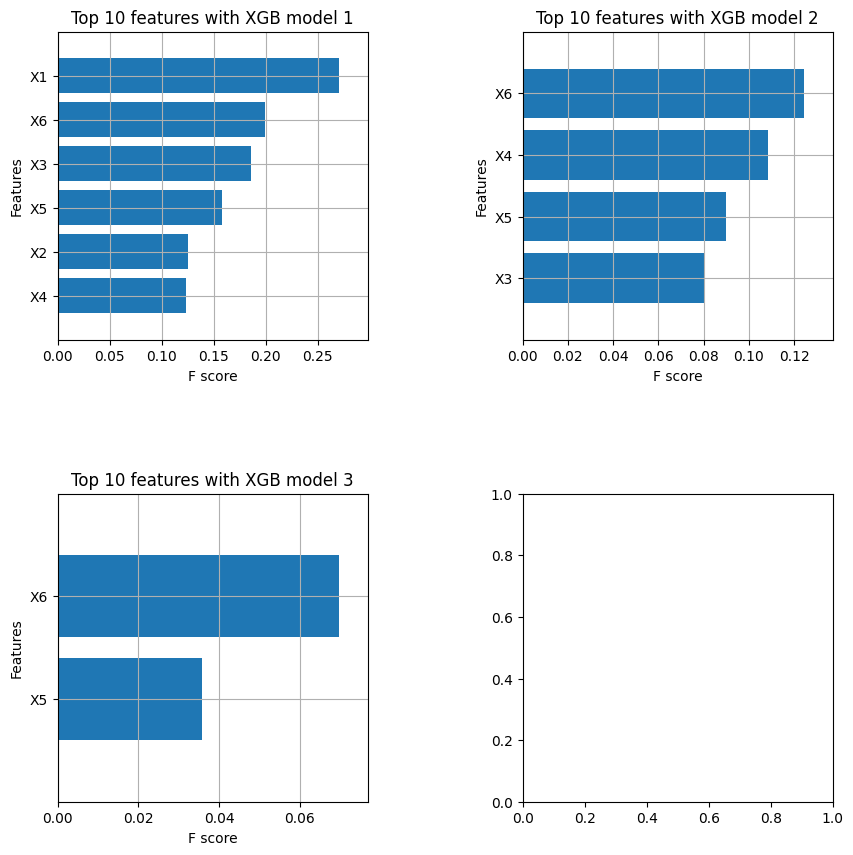

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 6 important features:
['X1', 'X6', 'X3', 'X5', 'X2', 'X4']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 6 important features and a train dataframe


In [66]:
features, train = featurewiz(df, 'Y', corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [67]:
X_train3 = sc.fit_transform(X_train.drop(['X2','X4'], axis='columns'))
X_test3 = sc.transform(X_test.drop(['X2','X4'], axis='columns'))

**SVM with features selected (probably no improvement)**

In [68]:
from sklearn.svm import SVC
model5 = SVC(kernel = 'linear')
model5.fit(X_train3, y_train)

SVC(kernel='linear')

In [69]:
model5.score(X_test3,y_test)

0.6153846153846154

In [70]:
#Seems all features are relevant

In [71]:
#In conclusion the initial models suffered dramatically from overfitting. Rather than trying to tune any of those from 
#such a poor starting point, I went with a support vector machine, which is less susceptible to overfitting. 
#Featurewiz determined that the features were all LI and all correlated to, or contained information about, the target.